### Unsupervised Learning_R4_Project1_Car mpg

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: cars-dataset.csvView in a new window

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete


Steps to follow:

1) EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

2) Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in    the plot should give a visual identification of different clusters existing in the dataset) – 5 points

3) Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the            clusters (15 points)

4) Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5        points)

In [3]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

#importing seaborn for statistical plots
import seaborn as sns

In [4]:
# reading data from the dataset
car_df = pd.read_csv ('cars-dataset.csv')

In [5]:
car_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [6]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


From the above we can see, the Horsepower is missing. 

In [7]:
temp = pd.DataFrame(car_df.hp.str.isdigit()) 

temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [8]:
# replacing all the '?' from our dataset
car_df = car_df.replace('?', np.nan)

In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


We can see that the Horsepower, i.e. 'hp', column is Object. 
Lets convert it into numeric type.

In [10]:
car_df['hp'] = car_df['hp'].astype('float64')

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [12]:
car_df['car name'].value_counts()

ford pinto                           6
amc matador                          5
ford maverick                        5
toyota corolla                       5
amc gremlin                          4
peugeot 504                          4
toyota corona                        4
chevrolet chevette                   4
amc hornet                           4
chevrolet impala                     4
chevrolet caprice classic            3
plymouth fury iii                    3
chevrolet vega                       3
dodge colt                           3
volkswagen dasher                    3
honda civic                          3
pontiac catalina                     3
chevrolet citation                   3
ford gran torino                     3
chevrolet nova                       3
plymouth duster                      3
ford galaxie 500                     3
oldsmobile cutlass salon brougham    2
plymouth reliant                     2
ford country squire (sw)             2
volkswagen rabbit        

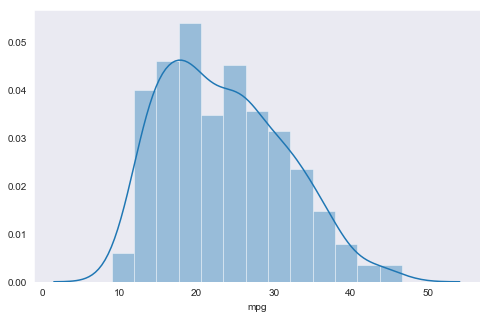

In [24]:
plt.figure(figsize = (8,5))
sns.set_style('dark')
sns.distplot(car_df['mpg'])
plt.show()

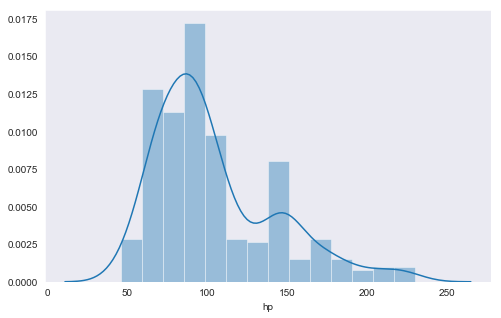

In [19]:
plt.figure(figsize = (8,5))
sns.set_style('dark')
sns.distplot(car_df['hp'])
plt.show()

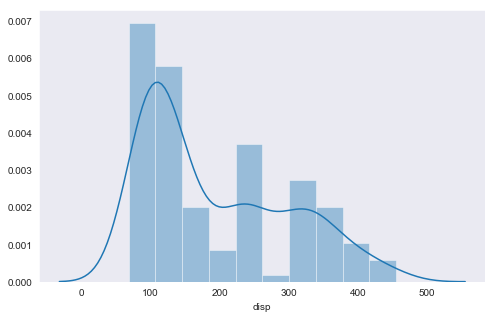

In [20]:
plt.figure(figsize = (8,5))
sns.set_style('dark')
sns.distplot(car_df['disp'])
plt.show()

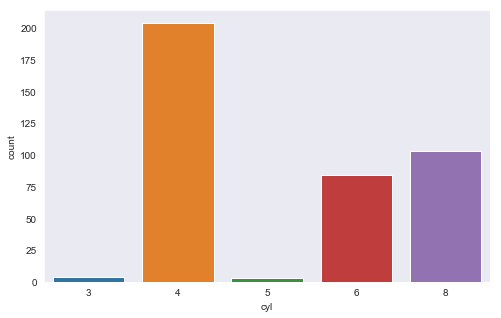

In [22]:
plt.figure(figsize = (8,5))
sns.set_style('dark')
sns.countplot(car_df['cyl'])
plt.show()

In [ ]:
# Pairplot using sns
#sns.pairplot(car_df, hue = "car name")

sns.pairplot(car_df.drop(['car name'], axis =1))
plt.show()

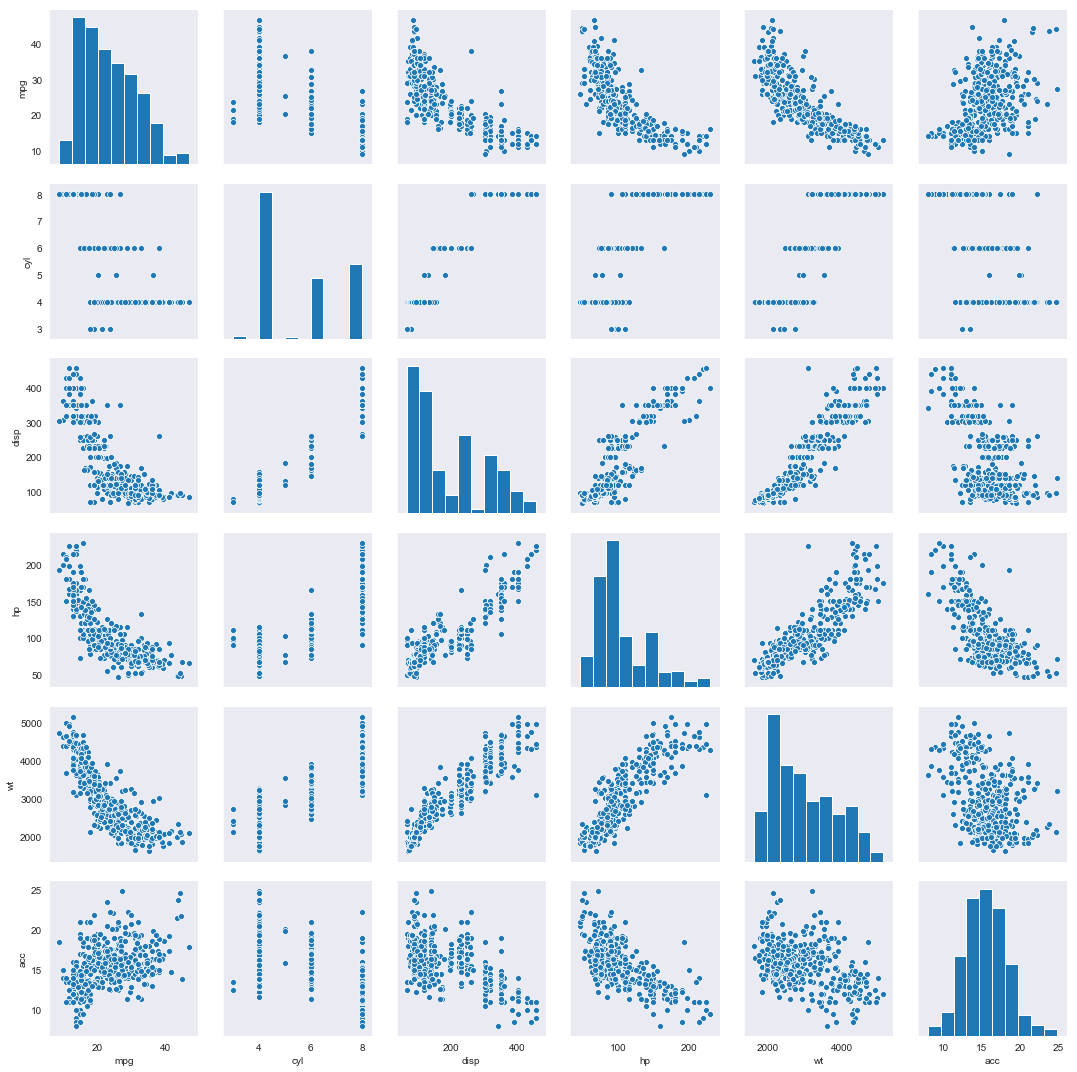

In [25]:
# Pairplot using sns
cols = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc']
sns.pairplot(car_df[cols])

Observations:

a. mpg seems to have negitive correlation with displacement, horsepower & weight.

b. displacement seems to have positive correlation with horsepower & weight.

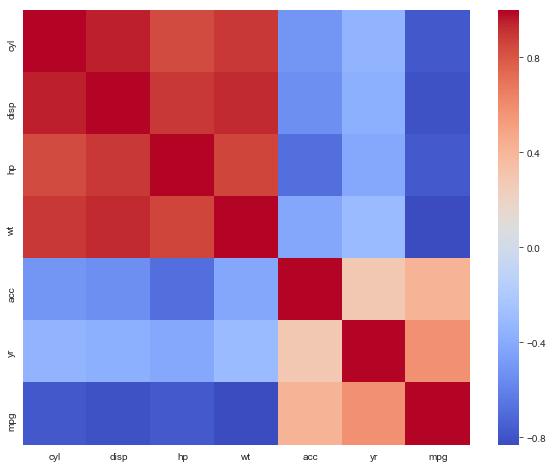

In [26]:
#heat map of numerical columns
temp_df = car_df.drop(['car name'], axis = 1)
corr = temp_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [13]:
num_cols = car_df.drop('car name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(car_df[['car name']])


num_cols = num_cols.apply(lambda x: x.fillna(x.median()),axis=0)
car_df = num_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


### Let us perform a Pair plot analysis to visually check the number of likely clusters

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


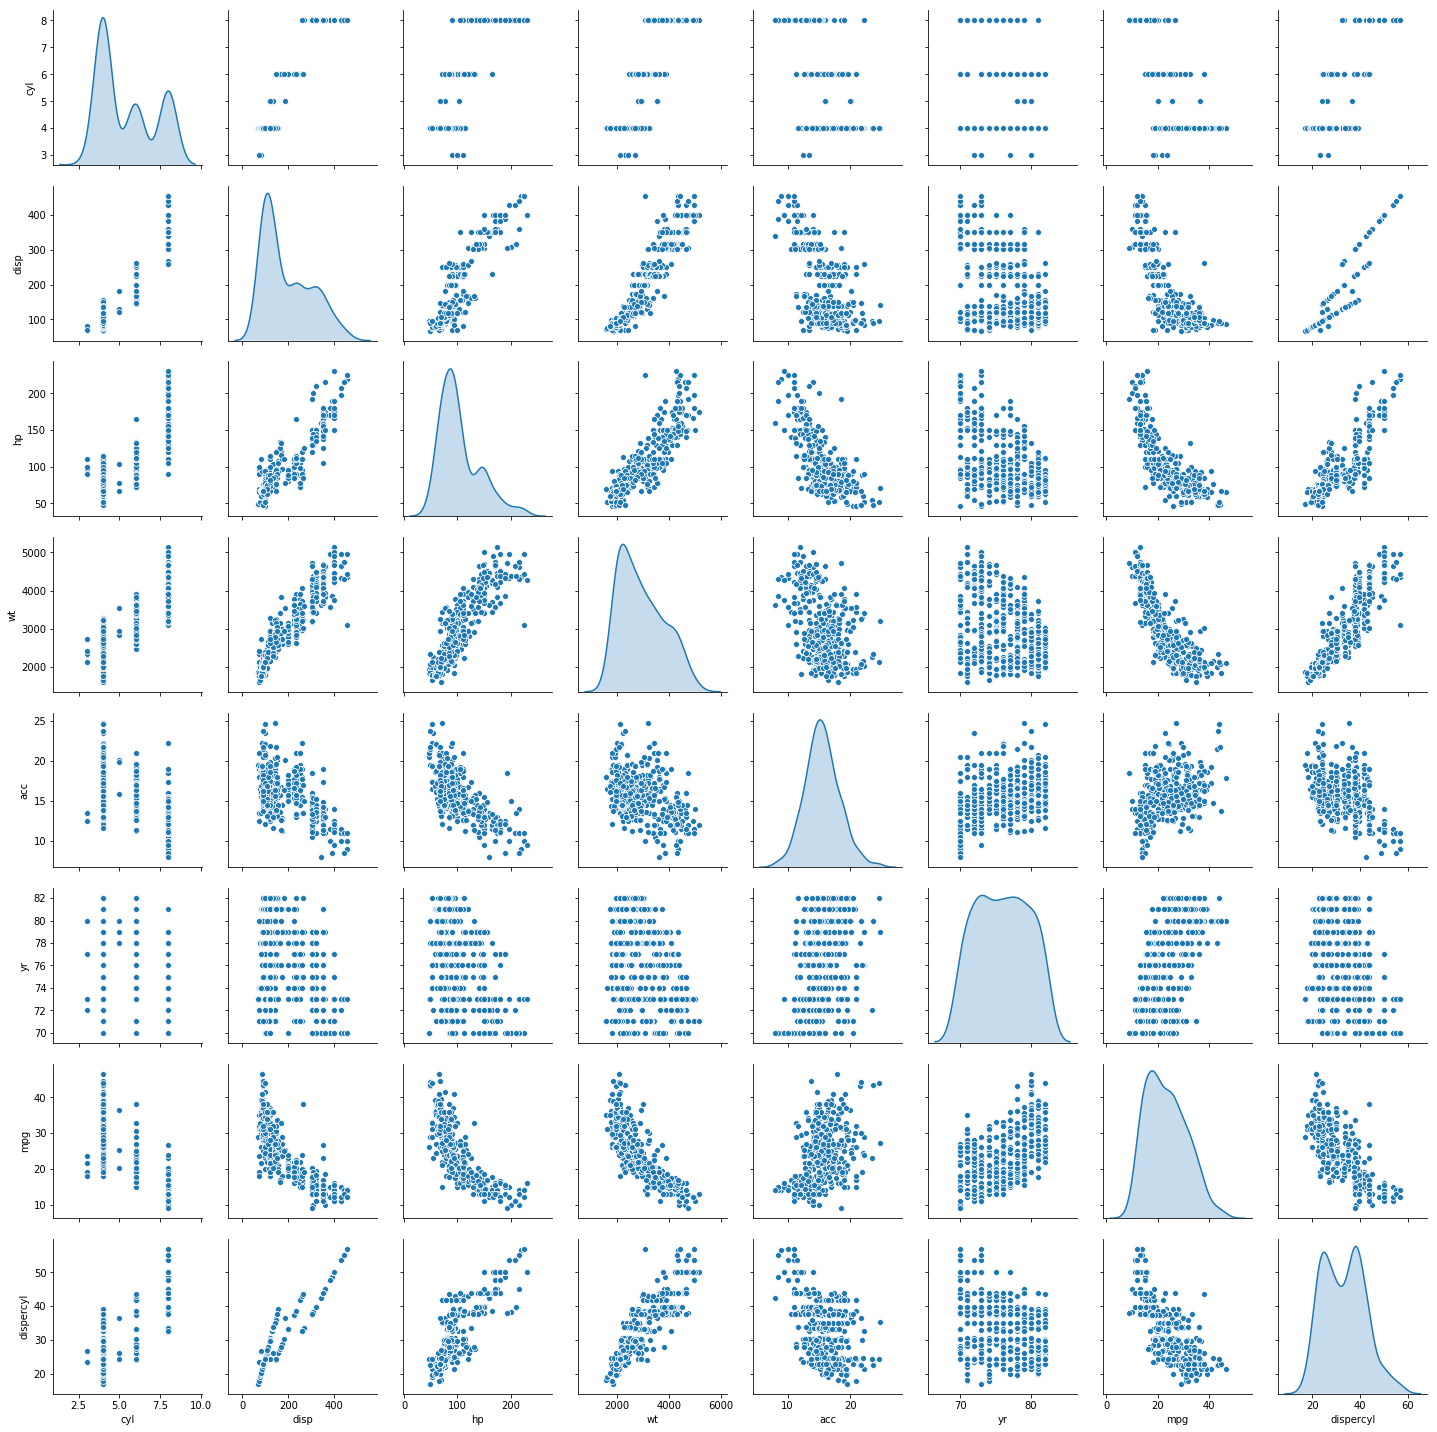

In [14]:
# This is done using scatter matrix function that creates a dashboard which reflects useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

car_df_attr = car_df.iloc[:, 0:7]
car_df_attr['dispercyl'] = car_df_attr['disp'] / car_df_attr['cyl']

sns.pairplot(car_df_attr, diag_kind='kde') # to plot density curve instead of histogram
             #hue= 'yr')


#sns.pairplot(car_df_attr)  # to plot histogram, the default

In [30]:
from scipy.stats import zscore

car_df_attr = car_df.loc[:, 'cyl':'mpg']
car_df_attr_z = car_df_attr.apply(zscore)

# Remove "yr" column
car_df_attr_z.pop('yr')

array = car_df_attr_z.values

In [29]:
# car_df.loc[:, 'cyl':'mpg']

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0
5,8,429.0,198.0,4341,10.0,70,15.0
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0
9,8,390.0,190.0,3850,8.5,70,15.0


In [38]:
car_df_attr.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


## KMeans Clustering

In [41]:
cluster_range = range( 2, 6)   # expect 2 to 3 clusters from the pair panel visual inspection hence restricting from 2 to 5
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.429910e+07
1,3,3.420799e+07
2,4,1.905160e+07
3,5,1.376961e+07


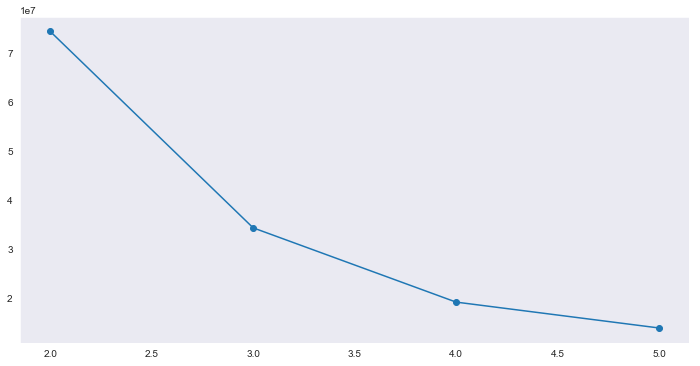

In [42]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [43]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [44]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(car_df_attr_z)
car_df_attr_z_copy = car_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [45]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [46]:
centroid_df = pd.DataFrame(centroids, columns = list(car_df_attr_z) )
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,1.486055,1.484507,1.506241,1.387534,-1.062679,-1.151105
1,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.753947
2,0.345983,0.236894,-0.067740,0.297952,0.300890,-0.472445


In [47]:
prediction=cluster.predict(car_df_attr_z)
car_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

### Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
### centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024492752E80>,
      dtype=object)

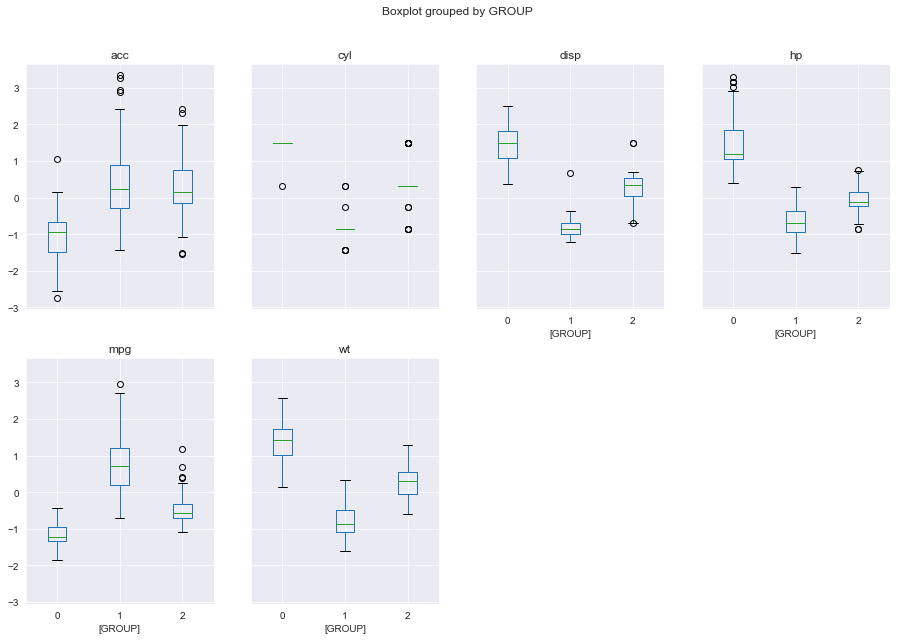

In [48]:
import matplotlib.pylab as plt

car_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

1. There are many outliers on each dimension  (indicated by the black circles)
2. Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
3. If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)


## Identifying and handling outliers

In [49]:
# Addressing outliers at group level

data = car_df_attr_z   # lazy to type long names. Renaming it to data. 
# Point to Remember: data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median() # replacing group outliers with group median      
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(car_df_attr_z['GROUP']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024482431FD0>,
      dtype=object)

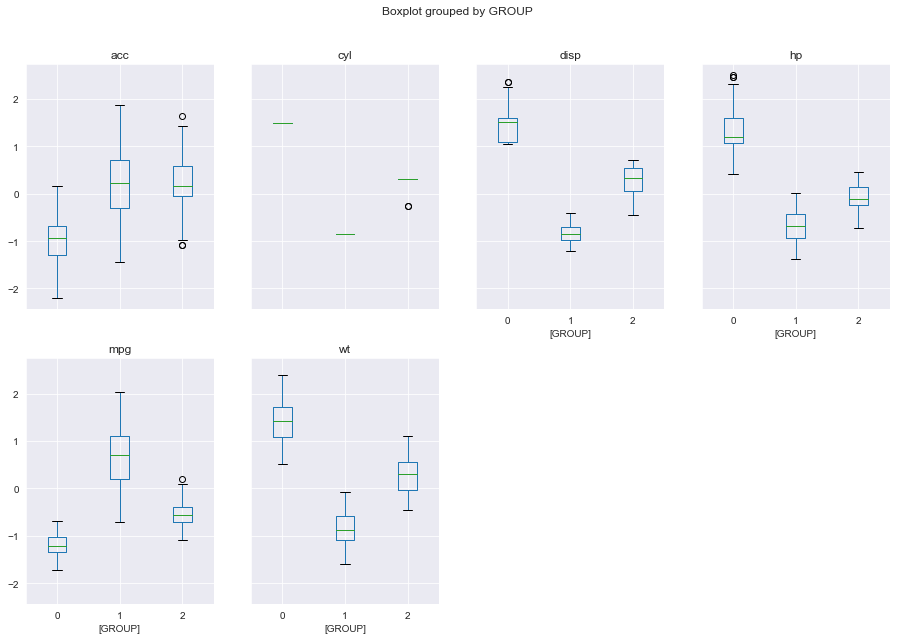

In [50]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

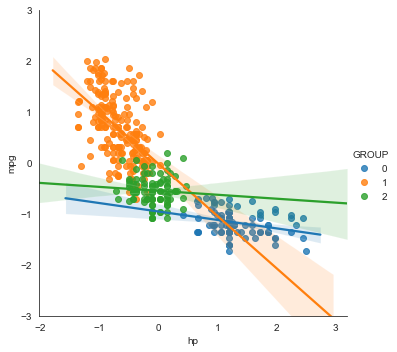

In [51]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP') # linear model plot lmplot
plot.set(ylim = (-3,3))

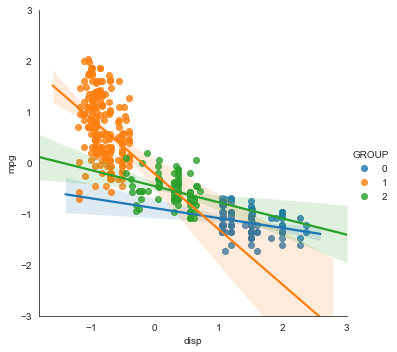

In [52]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

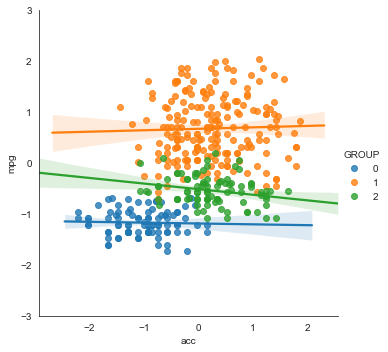

In [53]:
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

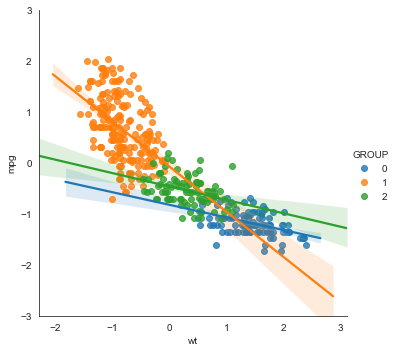

In [54]:
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [95]:
from scipy.stats import zscore

car_df_attr = car_df.loc[:, 'cyl':'mpg']
car_df_attr_z = car_df_attr.apply(zscore)

# Remove "yr" column
car_df_attr_z.pop('yr')

array = car_df_attr_z.values
X = array[:,0:5] # select all rows and first 4 columns which are the attributes
y = array[:,5]   # select all rows and the 0th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
#car_df_attr_z.iloc[:,5]

In [111]:
# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0 , max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = car_df_attr.columns[0:6]
print(feature_names)

k = 8
top_k_idx = feature_importances.argsort()[-k:][::-1]
print(feature_names[top_k_idx], feature_importances)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')
Index(['cyl', 'hp', 'wt', 'acc', 'disp'], dtype='object') [0.74427139 0.         0.19628857 0.04305003 0.01639001]


In [108]:
##car_df_attr.columns[0:6]

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')

In [112]:
y_pred = regressor.predict(X_test)

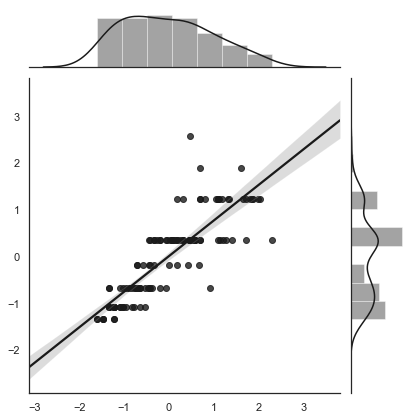

In [113]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

### Since the distribution on multiple attributes are not axis parallel, let us try SVM regressor

In [114]:
from sklearn import svm
clr = svm.SVR(C = 15 , degree=1, kernel='linear')  
clr.fit(X_train , y_train)

SVR(C=15, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [115]:
y_pred = clr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


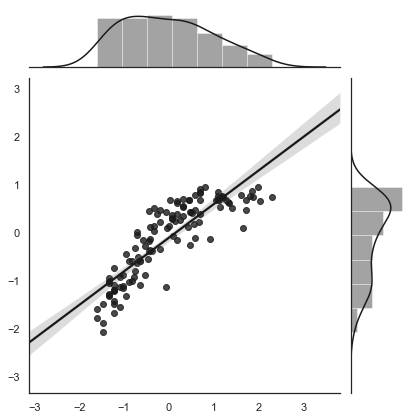

In [116]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
        
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 1, interaction_only=True)



X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [ 0.         -0.07349471 -0.01917336 -0.23164614 -0.56029602 -0.02877611]
0.687249355279187
0.7484914222588059


In [118]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         -0.02985711 -0.00273438 -0.14988458 -0.57216958  0.        ]


In [119]:

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.675886035978362
0.7370104160190215


In [120]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6872523551536476
0.7484948591982191
